# Catch that asteroid!
First, we need to increase the timeout time to allow the download of data occur properly:



In [1]:
from astropy.utils.data import conf

conf.dataurl

'http://data.astropy.org/'

In [27]:
conf.remote_timeout

10000.0

In [2]:
conf.remote_timeout = 10000

([<matplotlib.lines.Line2D at 0x7f8d37817a90>],
 <matplotlib.lines.Line2D at 0x7f8d378172e0>)

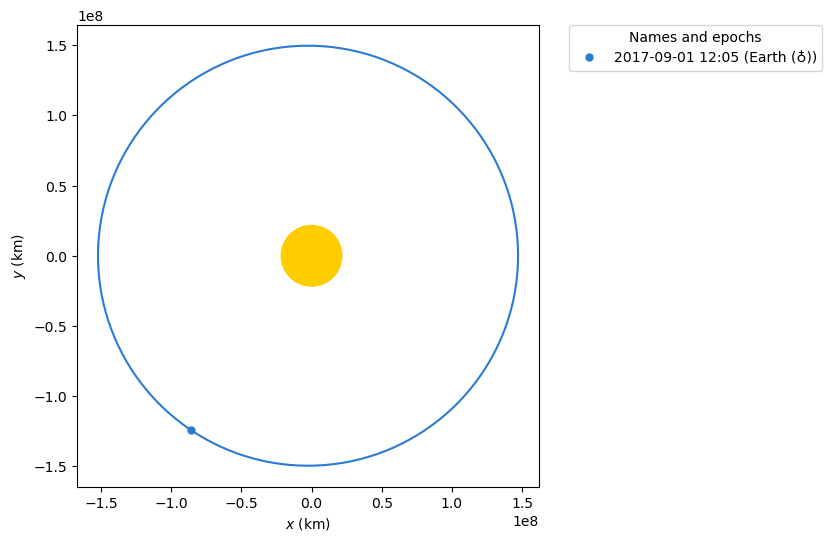

In [4]:
from astropy import units as u
from astropy.time import Time, TimeDelta
from astropy.coordinates import solar_system_ephemeris

solar_system_ephemeris.set("jpl")

from poliastro.bodies import Sun, Earth, Moon
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.plotting import StaticOrbitPlotter
from poliastro.plotting.misc import plot_solar_system
from poliastro.twobody import Orbit
from poliastro.util import norm, time_range

EPOCH = Time("2017-09-01 12:05:50", scale="tdb")
C_FLORENCE = "#000"
C_MOON = "#999"
Earth.plot(EPOCH)

In [5]:
florence_osc = Orbit.from_sbdb("Florence")
florence_osc

1 x 3 AU x 22.1 deg (HeliocentricEclipticIAU76) orbit around Sun (☉) at epoch 2460200.500800723 (TDB)

In [6]:
florence_osc.epoch.iso

'2023-09-13 00:01:09.182'

In [7]:
epochs = time_range(
    EPOCH - TimeDelta(3 * 30 * u.day), end=EPOCH + TimeDelta(3 * 30 * u.day)
)
florence = Ephem.from_horizons("Florence", epochs, plane=Planes.EARTH_ECLIPTIC)
florence

Ephemerides at 50 epochs from 2017-06-03 12:05:50.000 (TDB) to 2017-11-30 12:05:50.000 (TDB)

In [8]:
florence.plane

<Planes.EARTH_ECLIPTIC: 'Earth mean Ecliptic and Equinox of epoch (J2000.0)'>

In [9]:
earth = Ephem.from_body(Earth, epochs, plane=Planes.EARTH_ECLIPTIC)
earth

Ephemerides at 50 epochs from 2017-06-03 12:05:50.000 (TDB) to 2017-11-30 12:05:50.000 (TDB)

In [10]:
min_distance = norm(florence.rv(EPOCH)[0] - earth.rv(EPOCH)[0]) - Earth.R
min_distance.to(u.km)

<Quantity 7060098.69933005 km>

This value is consistent with what ESA says! 7060160 km

In [11]:
abs((min_distance - 7060160 * u.km) / (7060160 * u.km)).decompose()

<Quantity 8.68261767e-06>

In [12]:
from IPython.display import HTML

HTML(
    """<blockquote class="twitter-tweet" data-lang="en"><p lang="es" dir="ltr">La <a href="https://twitter.com/esa_es">@esa_es</a> ha preparado un resumen del asteroide <a href="https://twitter.com/hashtag/Florence?src=hash">#Florence</a> 😍 <a href="https://t.co/Sk1lb7Kz0j">pic.twitter.com/Sk1lb7Kz0j</a></p>&mdash; AeroPython (@AeroPython) <a href="https://twitter.com/AeroPython/status/903197147914543105">August 31, 2017</a></blockquote>
<script src="//platform.twitter.com/widgets.js" charset="utf-8"></script>"""
)

([<matplotlib.lines.Line2D at 0x7f8d37b84d90>],
 <matplotlib.lines.Line2D at 0x7f8d37b77100>)

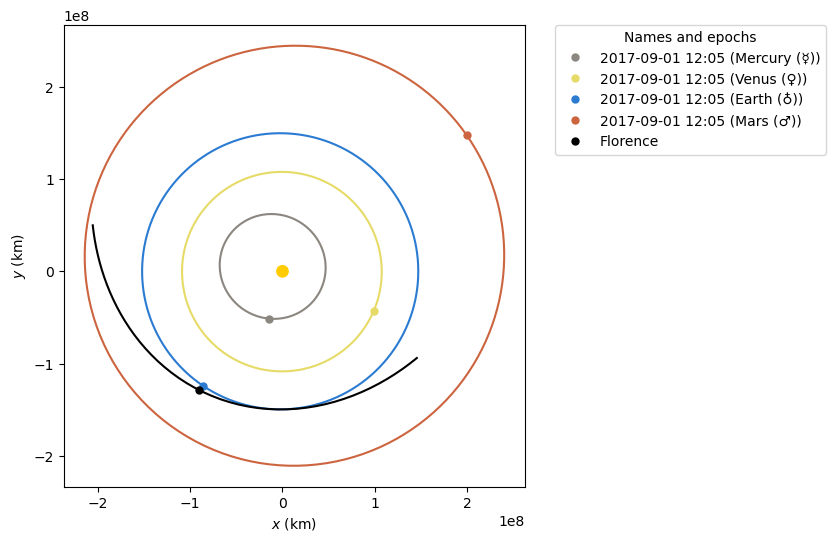

In [13]:
frame = plot_solar_system(outer=False, epoch=EPOCH)
frame.plot_ephem(florence, EPOCH, label="Florence", color=C_FLORENCE)

In [30]:
epochs2 = time_range(
    EPOCH - TimeDelta(5 * u.day), end=EPOCH + TimeDelta(5 * u.day)
)
florence_e = Ephem.from_horizons("Florence", epochs2, attractor=Earth)
florence_e

Ephemerides at 50 epochs from 2017-08-27 12:05:50.000 (TDB) to 2017-09-06 12:05:50.000 (TDB)

In [31]:
moon = Ephem.from_body(Moon, epochs2, attractor=Earth)
moon

Ephemerides at 50 epochs from 2017-08-27 12:05:50.000 (TDB) to 2017-09-06 12:05:50.000 (TDB)

([<matplotlib.lines.Line2D at 0x7f8d1b2675b0>],
 <matplotlib.lines.Line2D at 0x7f8d1b267820>)

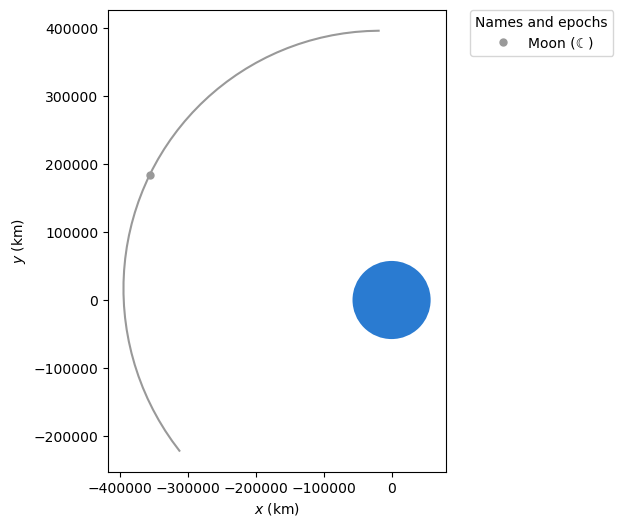

In [36]:
from matplotlib import pyplot as plt
plotter = StaticOrbitPlotter()
plotter.set_attractor(Earth)
plotter.set_body_frame(Moon)
plotter.plot_ephem(moon, EPOCH, label=Moon, color=C_MOON)


([<matplotlib.lines.Line2D at 0x7f8d36a3d490>],
 <matplotlib.lines.Line2D at 0x7f8d36d0bd00>)

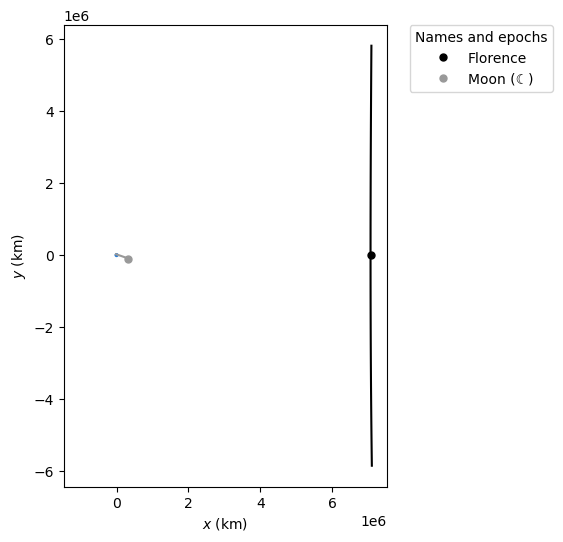

In [26]:
frame = StaticOrbitPlotter()

frame.set_attractor(Earth)
frame.set_orbit_frame(Orbit.from_ephem(Earth, florence_e, EPOCH))

frame.plot_ephem(florence_e, EPOCH, label="Florence", color=C_FLORENCE)
frame.plot_ephem(moon, EPOCH, label=Moon, color=C_MOON)